In [113]:
%matplotlib inline
import matplotlib.pyplot as pyplt
import ast
import pandas as pd
from matplotlib.ticker import PercentFormatter, MultipleLocator

In [114]:
path = "2023-11-02-LQz4"
# region = "ap-northeast-1"
region = "ap-northeast-2"
# region = "ap-northeast-2"
# region = "ap-northeast-3"
# region = "ap-south-1"
# region = "ap-southeast-1"
# region = "ap-southeast-2"
# region = "ca-central-1"
# region = "eu-central-1"
# region = "eu-north-1"
# region = "eu-west-1"
# region = "eu-west-2"
# region = "eu-west-3"
# region = "sa-east-1"
# region = "us-east-1"
# region = "us-east-2"
# region = "us-west-1"
# region = "us-west-2"
data_path = f'./result_data/{path}/result.csv'

In [115]:
df = pd.read_csv(data_path)
df = df[df['Region'] == region]
df.head()

,Region,vCPU_Count,region_vCPU_Percent,Timestamp
0,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.698924e+09
1,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.698924e+09
2,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.698924e+09
3,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.698924e+09
4,ap-northeast-2,"{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...","{'INF': 0, 'TRN': 0, 'DL': 0, 'G_VT': 0, 'P5':...",1.698924e+09


In [116]:
df['vCPU_Count'] = df['vCPU_Count'].apply(ast.literal_eval)
df['region_vCPU_Percent'] = df['region_vCPU_Percent'].apply(ast.literal_eval)

In [117]:
vcpu_cols = df['vCPU_Count'].apply(pd.Series)
vcpu_cols = vcpu_cols.add_prefix('number_')

percent_cols = df['region_vCPU_Percent'].apply(pd.Series)
percent_cols = percent_cols.add_prefix('percent_')

# UTC Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')

In [118]:
df = pd.concat([df.drop(['vCPU_Count', 'region_vCPU_Percent'], axis=1), vcpu_cols, percent_cols], axis=1)
df.sort_values('Timestamp',inplace=True)
df.head()

,Region,Timestamp,number_INF,number_TRN,number_DL,number_G_VT,number_P5,number_P2_P3_P4,number_F,number_X,number_STANDARD,percent_INF,percent_TRN,percent_DL,percent_G_VT,percent_P5,percent_P2_P3_P4,percent_F,percent_X,percent_STANDARD
44,ap-northeast-2,2023-11-02 11:22:52,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
45,ap-northeast-2,2023-11-02 11:22:58,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
116,ap-northeast-2,2023-11-02 11:23:03,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,ap-northeast-2,2023-11-02 11:23:09,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
209,ap-northeast-2,2023-11-02 11:23:14,0,0,0,0,0,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25


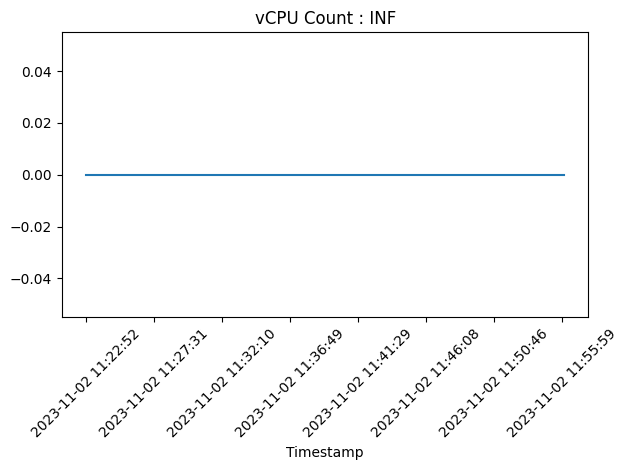

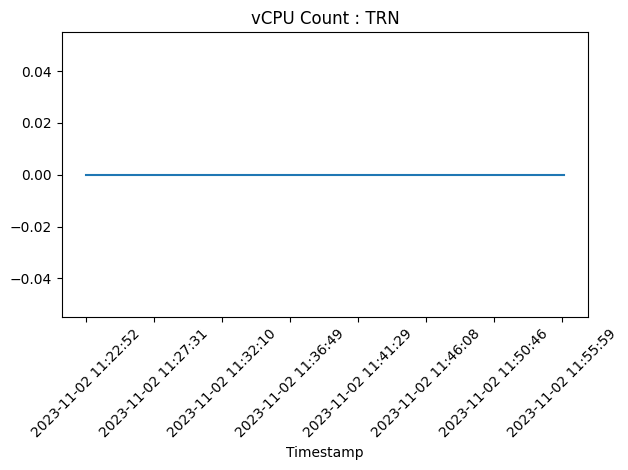

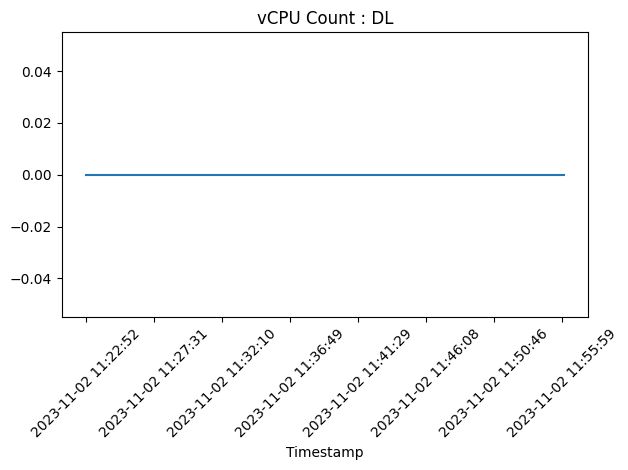

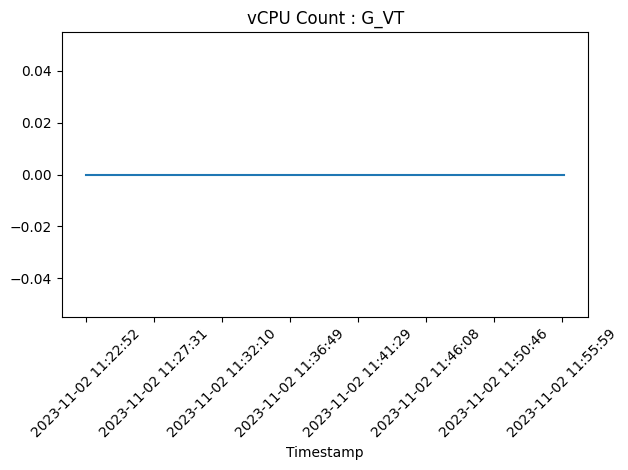

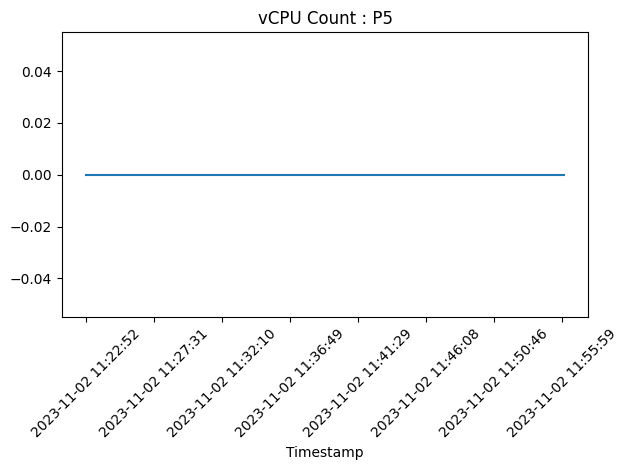

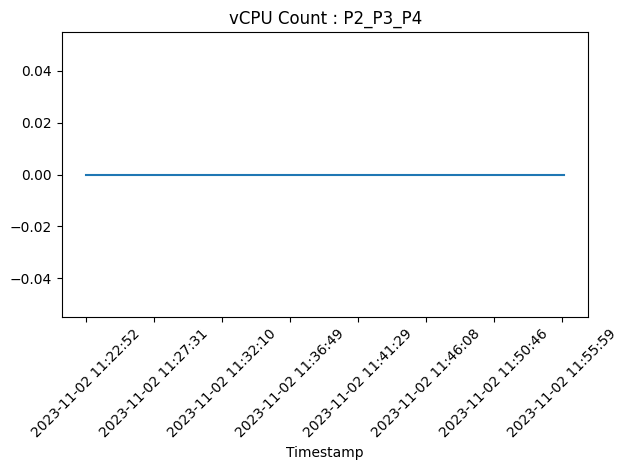

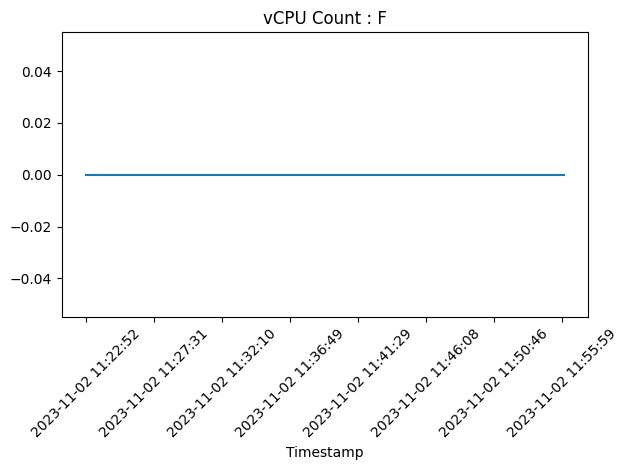

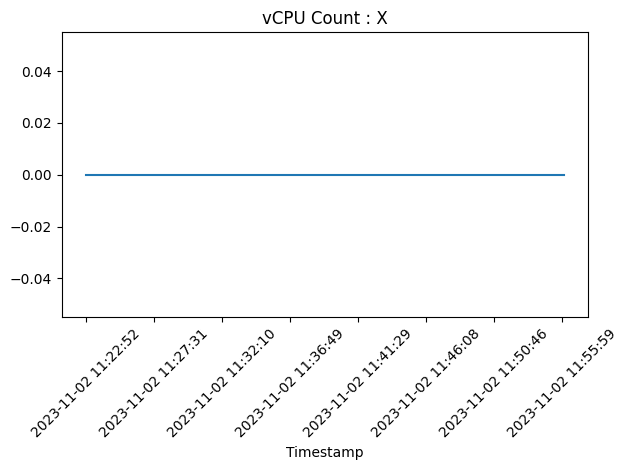

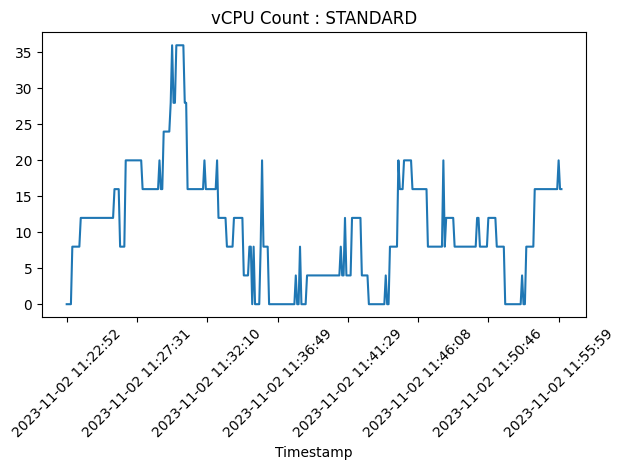

In [119]:
for column in vcpu_cols.columns:
    fig, ax = pyplt.subplots()
    df.plot(x='Timestamp', y=f'{column}', ax=ax, title=f'vCPU Count : {column[7:]}', rot=45, legend=False)
    pyplt.tight_layout()
    pyplt.show()

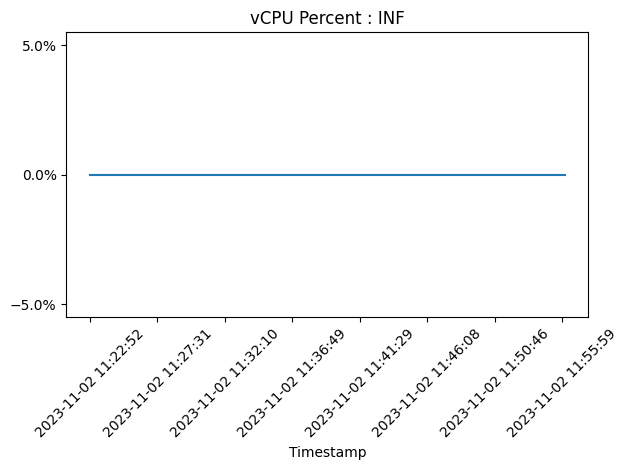

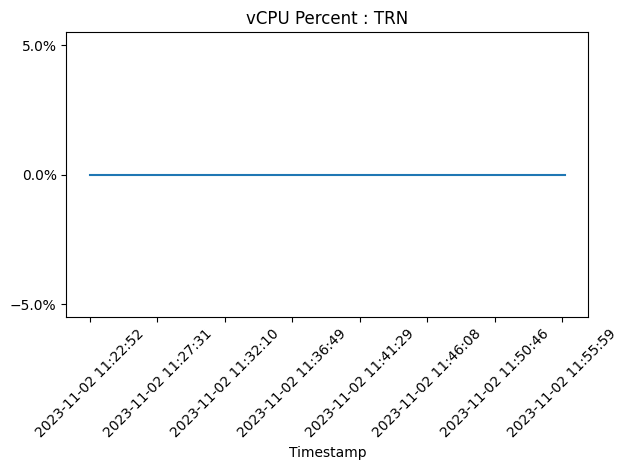

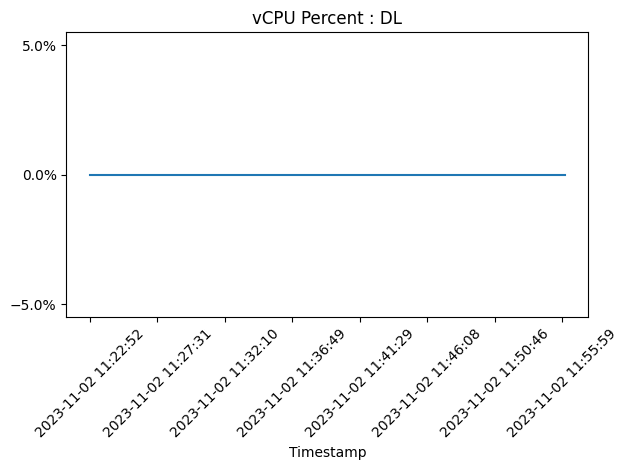

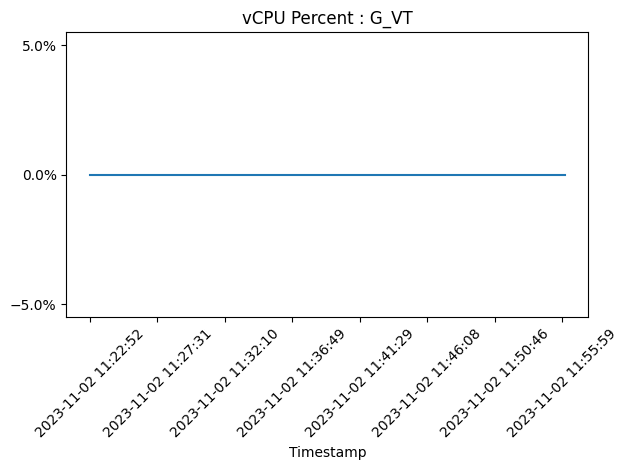

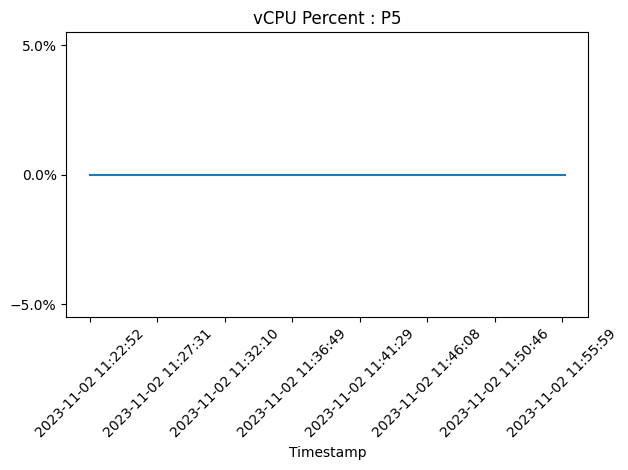

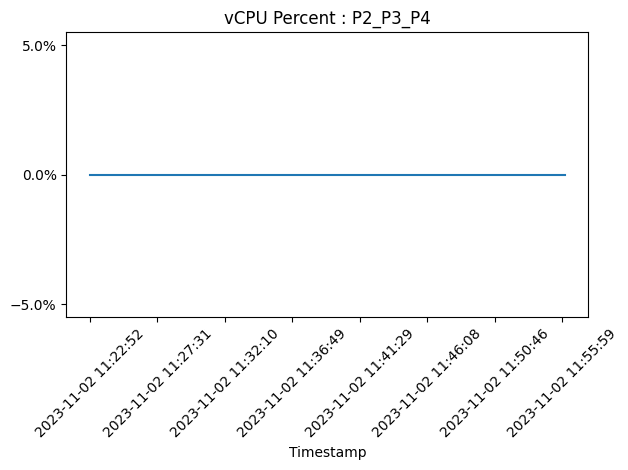

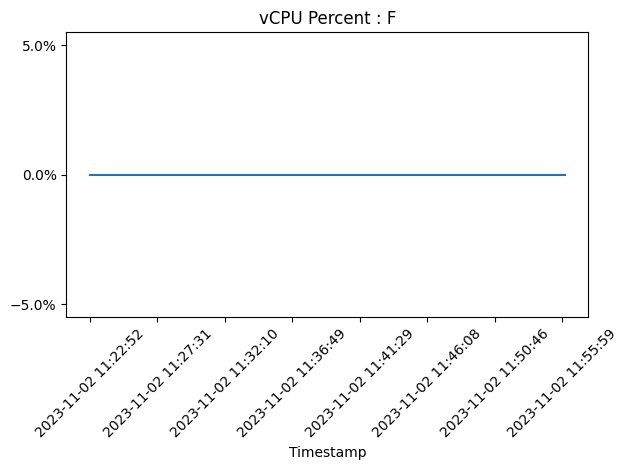

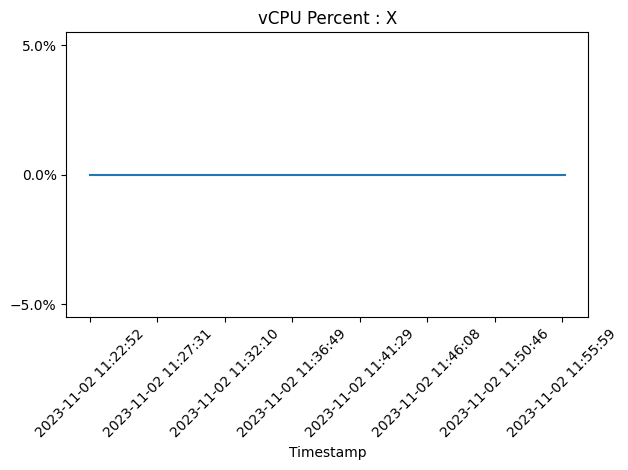

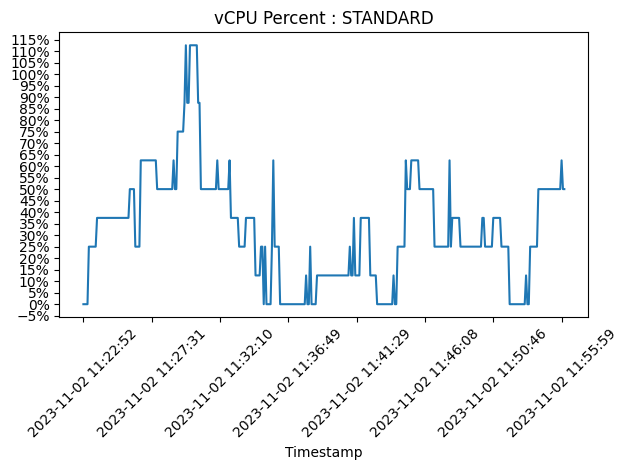

In [120]:
for column in percent_cols.columns:
    fig, ax = pyplt.subplots()
    df.plot(x='Timestamp', y=f'{column}', ax=ax, title=f'vCPU Percent : {column[8:]}', rot=45, legend=False)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.05))
    pyplt.tight_layout()
    pyplt.show()